In [1]:
import nexus as nx
import numpy as np
import matplotlib.pyplot as plt

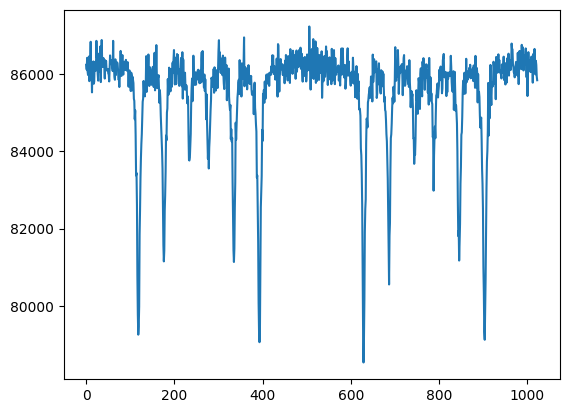

In [2]:
iron = nx.Material.Template(nx.lib.material.Fe)

layer_Fe = nx.Layer(id = "Fe layer",
                    material = iron,
                    thickness = 3000)

site = nx.Hyperfine(magnetic_field = 33.3,
                    isotropic = True)

iron.hyperfine_sites = [site]

sample = nx.Sample(layers = [layer_Fe])

beam = nx.Beam(polarization = 0)

exp = nx.Experiment(beam = beam,
                    objects = [sample],
                    isotope = nx.lib.moessbauer.Fe57)

velocities = np.linspace(-10, 10, 512)

moessbauer_spectrum = nx.MoessbauerSpectrum(experiment = exp,
                                            velocity = velocities,
                                            id  = "my first spectrum",
                                            resolution = 2)

intensity = moessbauer_spectrum.Calculate()


scaling = 1e5
intensity = np.append(np.random.poisson(intensity * scaling), np.flip(np.roll(np.random.poisson(intensity * scaling), 1)))

plt.plot(intensity)
plt.show()

np.savetxt('Fe_calibration.dat', intensity)